In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.DataFrame([line.split(";") for line in open("bank.csv")])
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head(20)

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y""\n"
1,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no""\n"
2,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no""\n"
3,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no""\n"
4,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no""\n"
5,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no""\n"
6,35,"""management""","""single""","""tertiary""","""no""",747,"""no""","""no""","""cellular""",23,"""feb""",141,2,176,3,"""failure""","""no""\n"
7,36,"""self-employed""","""married""","""tertiary""","""no""",307,"""yes""","""no""","""cellular""",14,"""may""",341,1,330,2,"""other""","""no""\n"
8,39,"""technician""","""married""","""secondary""","""no""",147,"""yes""","""no""","""cellular""",6,"""may""",151,2,-1,0,"""unknown""","""no""\n"
9,41,"""entrepreneur""","""married""","""tertiary""","""no""",221,"""yes""","""no""","""unknown""",14,"""may""",57,2,-1,0,"""unknown""","""no""\n"
10,43,"""services""","""married""","""primary""","""no""",-88,"""yes""","""yes""","""cellular""",17,"""apr""",313,1,147,2,"""failure""","""no""\n"


In [3]:
#check data types
df.dtypes

0
"age"          object
"job"          object
"marital"      object
"education"    object
"default"      object
"balance"      object
"housing"      object
"loan"         object
"contact"      object
"day"          object
"month"        object
"duration"     object
"campaign"     object
"pdays"        object
"previous"     object
"poutcome"     object
"y"\n          object
dtype: object

In [4]:
#convert data types
df.columns =  [col.replace('"', '') for col in df.columns]

df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]] = df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]].astype(int)

df.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int32
housing      object
loan         object
contact      object
day           int32
month        object
duration      int32
campaign      int32
pdays         int32
previous      int32
poutcome     object
y\n          object
dtype: object

In [5]:
#check for missing values, no imputation needed
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y\n          0
dtype: int64


In [6]:
#count unique values in features to check for high cardinality
cat_columns = df.select_dtypes("object").columns.tolist()[:-1]
for col in cat_columns:
    print(col, ": ", df[col].value_counts(), "\n")

job :  "management"       969
"blue-collar"      946
"technician"       768
"admin."           478
"services"         417
"retired"          230
"self-employed"    183
"entrepreneur"     168
"unemployed"       128
"housemaid"        112
"student"           84
"unknown"           38
Name: job, dtype: int64 

marital :  "married"     2797
"single"      1196
"divorced"     528
Name: marital, dtype: int64 

education :  "secondary"    2306
"tertiary"     1350
"primary"       678
"unknown"       187
Name: education, dtype: int64 

default :  "no"     4445
"yes"      76
Name: default, dtype: int64 

housing :  "yes"    2559
"no"     1962
Name: housing, dtype: int64 

loan :  "no"     3830
"yes"     691
Name: loan, dtype: int64 

contact :  "cellular"     2896
"unknown"      1324
"telephone"     301
Name: contact, dtype: int64 

month :  "may"    1398
"jul"     706
"aug"     633
"jun"     531
"nov"     389
"apr"     293
"feb"     222
"jan"     148
"oct"      80
"sep"      52
"mar"      49
"de

In [7]:
#label encode target
encoder = LabelEncoder()

df["y\n"] = encoder.fit_transform(df.iloc[:, -1])

df["y\n"].value_counts()

0    4000
1     521
Name: y\n, dtype: int64

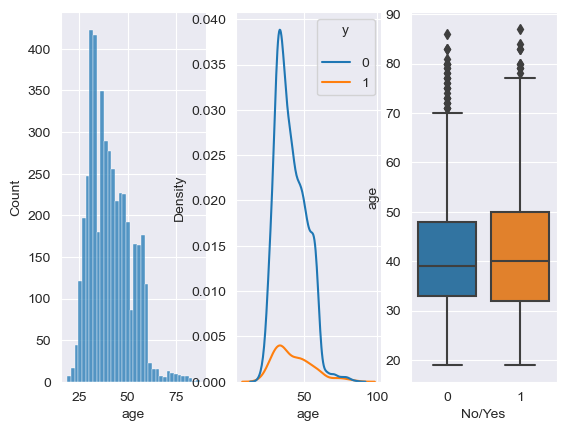

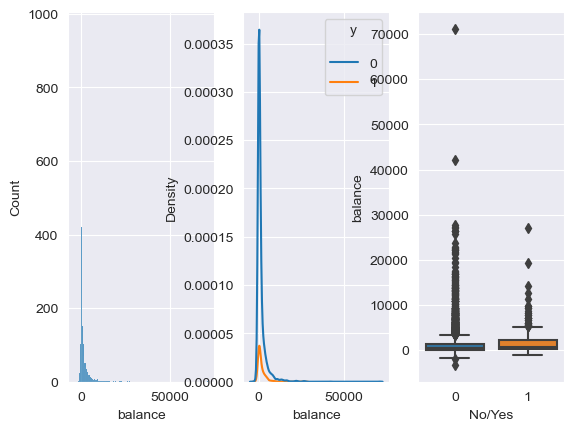

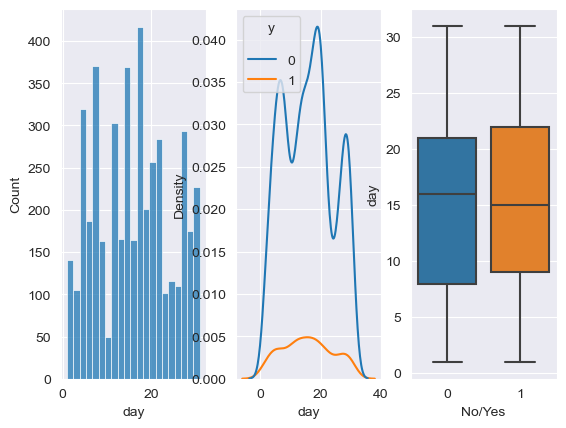

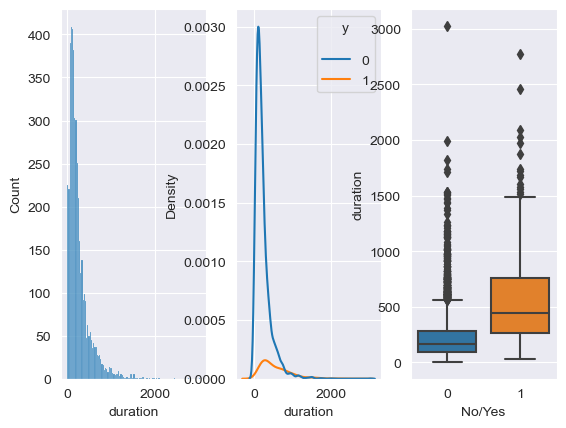

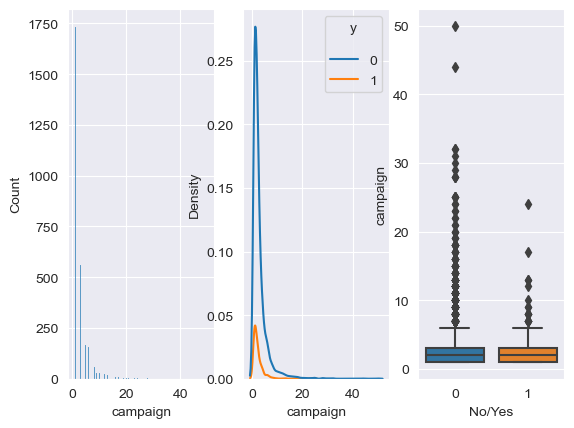

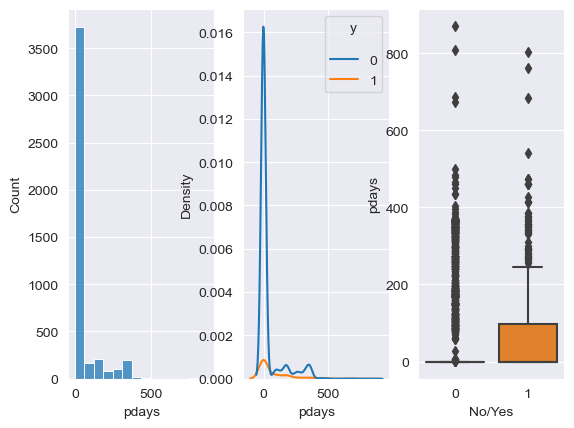

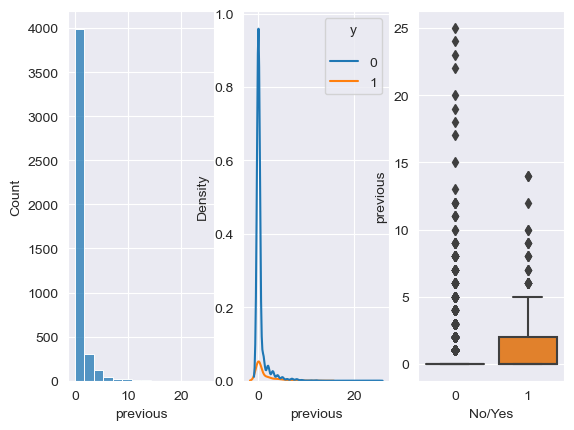

In [8]:
#EDA
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt


int_cols = df.select_dtypes("int").columns.tolist()[:-1]

sns.set_style("darkgrid")

#observe frequency distribution and relationship with target for all continuous features 
for i in int_cols:
    fig, ax = plt.subplots(1, 3)
    
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.kdeplot(data=df, x=i, hue="y\n", ax=ax[1])
    sns.boxplot(data=df, x="y\n", y=i, ax=ax[2]).set(xlabel="No/Yes")

<Axes: >

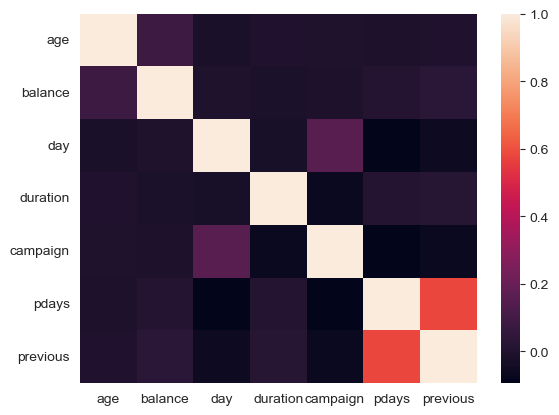

In [9]:
corr = df[int_cols].corr()
sns.heatmap(corr) 

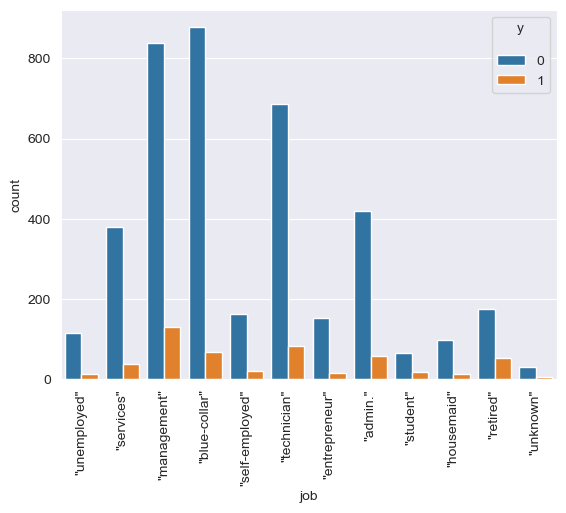

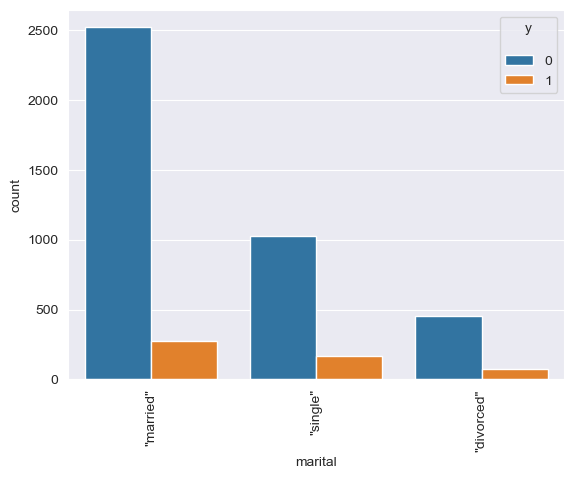

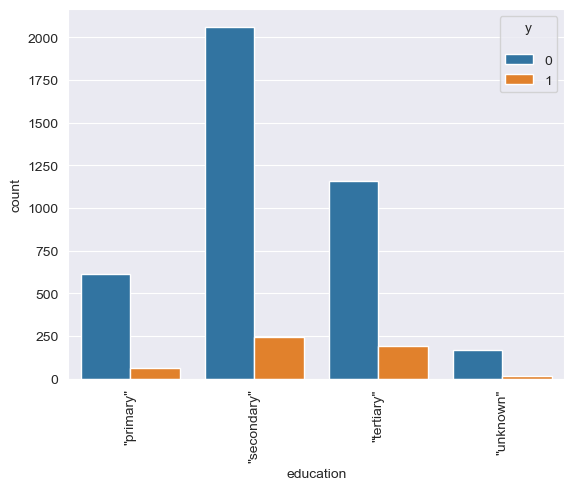

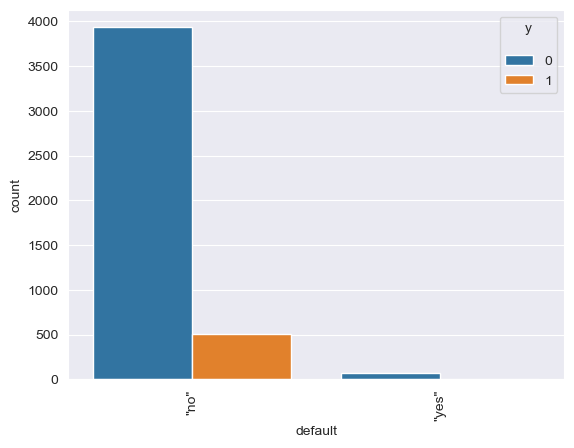

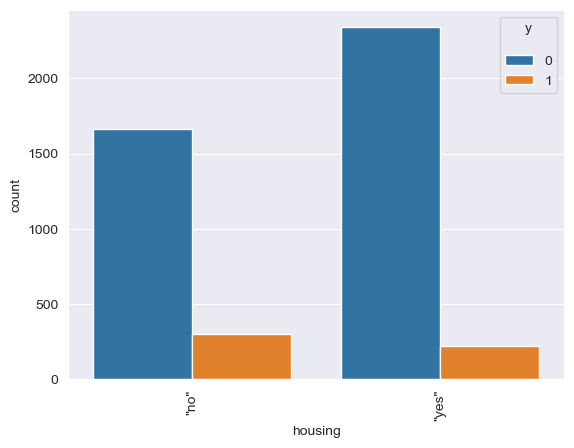

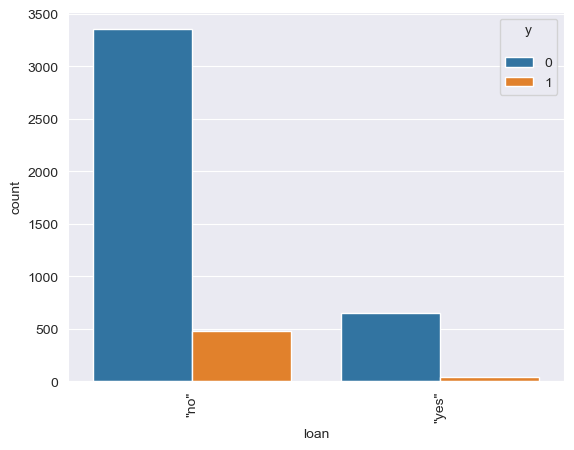

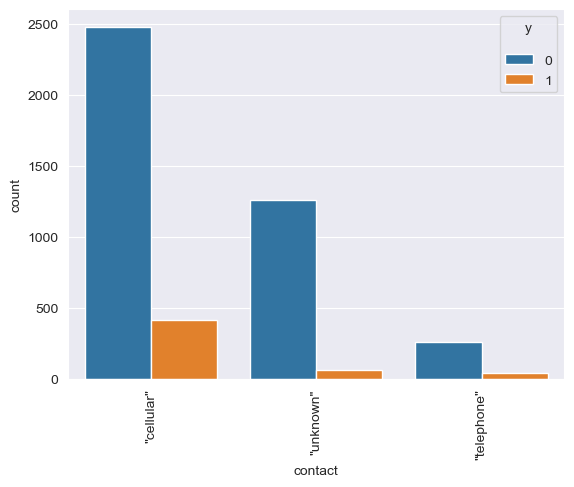

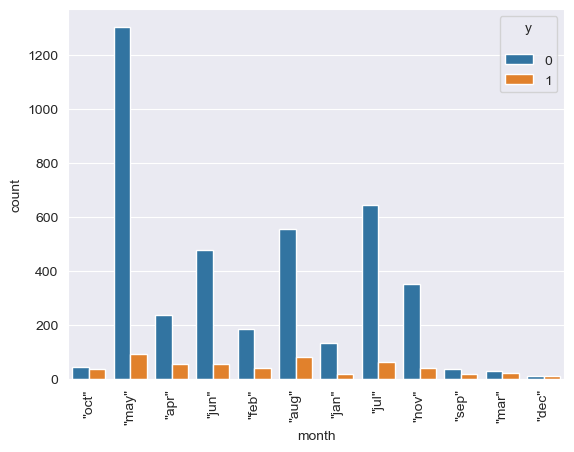

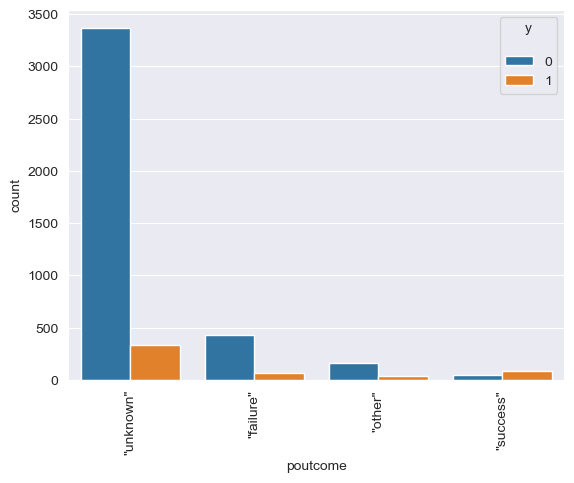

In [10]:
#EDA for Categorical Features
for i in cat_columns:
    
    fig, ax = plt.subplots(1, 1)
    sns.countplot(x=i, data=df, hue="y\n")
    plt.xticks(rotation="vertical")

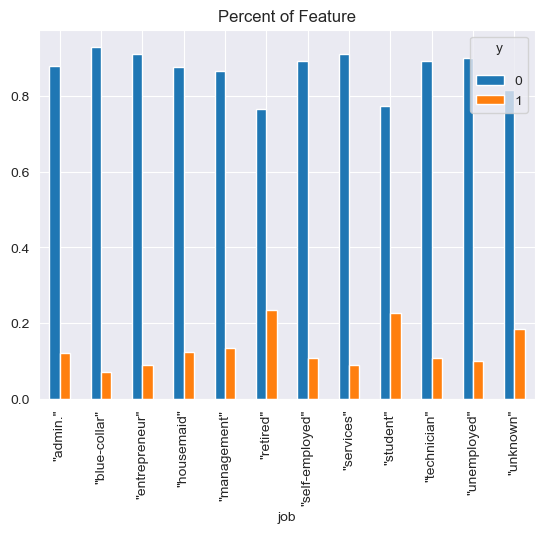

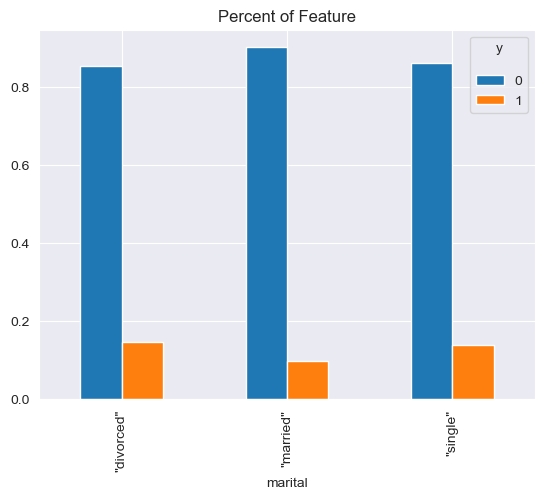

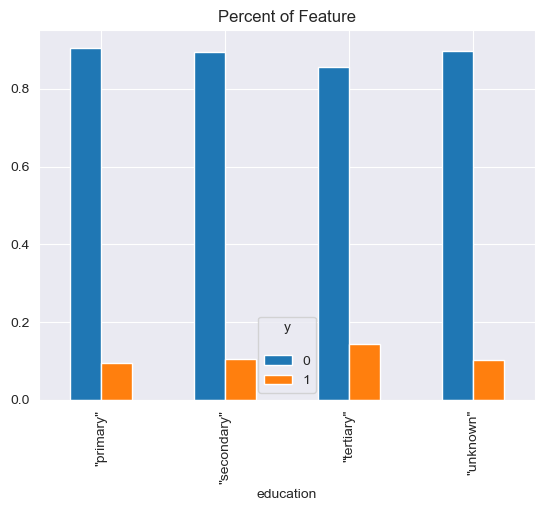

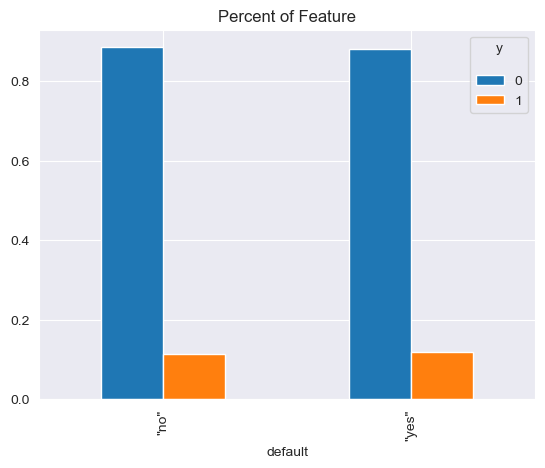

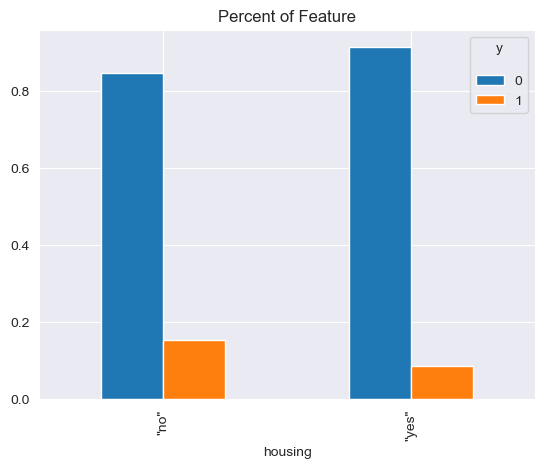

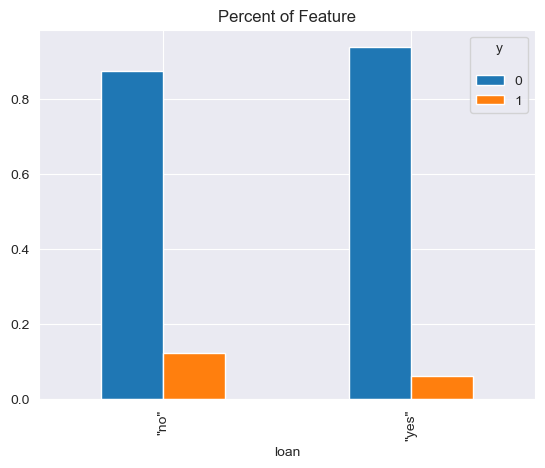

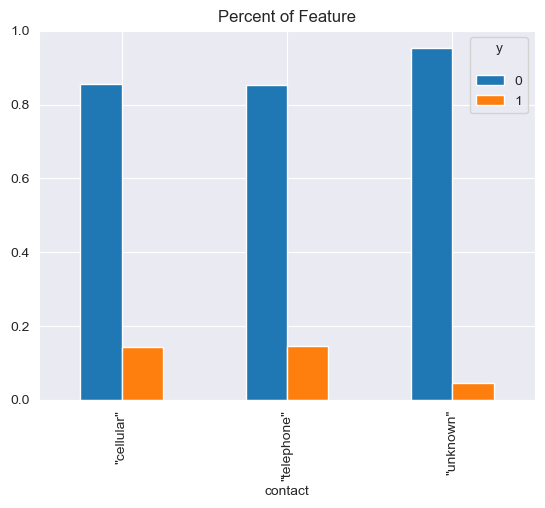

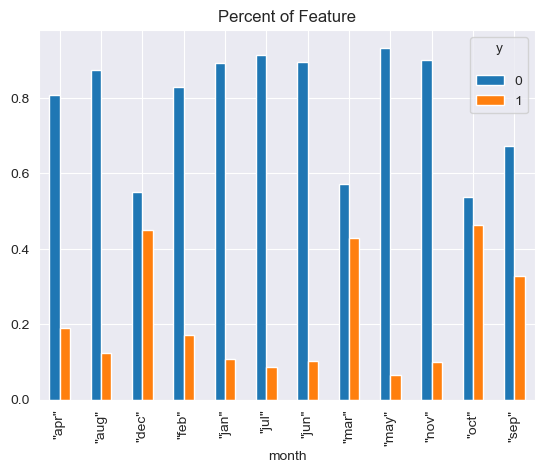

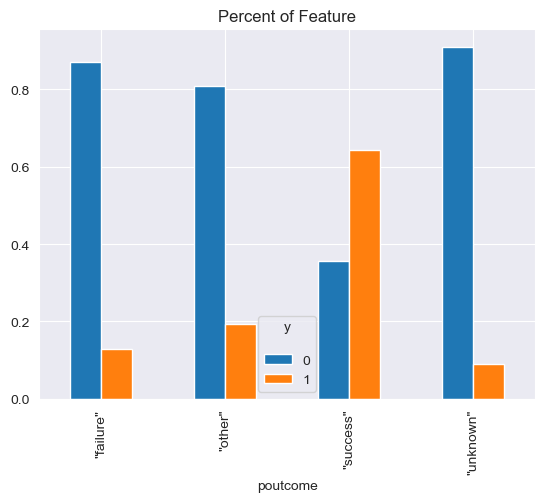

In [11]:
#observe feature/target relationship in proportionatly
for i in cat_columns:
    df.groupby(i)["y\n"].value_counts(normalize=True).unstack().plot(kind="bar").set_title("Percent of Feature")

In [12]:
#one hot encode categorical features
ohe = OneHotEncoder(sparse=False)

encoded_df = pd.DataFrame(ohe.fit_transform(df[cat_columns]))

encoded_df.columns = ohe.get_feature_names_out()

df.drop(cat_columns, axis=1, inplace=True)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df_new = df.join(encoded_df)
df_new = df_new.dropna()

column_to_move = df_new.pop("y\n")

print(df_new)

      age  balance  day  duration  campaign  pdays  previous  job_"admin."  \
1      30     1787   19        79         1     -1         0           0.0   
2      33     4789   11       220         1    339         4           0.0   
3      35     1350   16       185         1    330         1           0.0   
4      30     1476    3       199         4     -1         0           0.0   
5      59        0    5       226         1     -1         0           0.0   
...   ...      ...  ...       ...       ...    ...       ...           ...   
4516   32      473    7       624         5     -1         0           0.0   
4517   33     -333   30       329         5     -1         0           0.0   
4518   57    -3313    9       153         1     -1         0           0.0   
4519   57      295   19       151        11     -1         0           0.0   
4520   28     1137    6       129         4    211         3           0.0   

      job_"blue-collar"  job_"entrepreneur"  ...  month_"jun"  

In [14]:
df_new.insert(len(df_new.columns), "y\n", column_to_move)

print(df_new)

x_train, x_test, y_train, y_test = train_test_split(df_new.iloc[:, :len(df_new.columns)-1], df_new.iloc[:, -1], test_size=.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

      age  balance  day  duration  campaign  pdays  previous  job_"admin."  \
1      30     1787   19        79         1     -1         0           0.0   
2      33     4789   11       220         1    339         4           0.0   
3      35     1350   16       185         1    330         1           0.0   
4      30     1476    3       199         4     -1         0           0.0   
5      59        0    5       226         1     -1         0           0.0   
...   ...      ...  ...       ...       ...    ...       ...           ...   
4516   32      473    7       624         5     -1         0           0.0   
4517   33     -333   30       329         5     -1         0           0.0   
4518   57    -3313    9       153         1     -1         0           0.0   
4519   57      295   19       151        11     -1         0           0.0   
4520   28     1137    6       129         4    211         3           0.0   

      job_"blue-collar"  job_"entrepreneur"  ...  month_"mar"  

In [15]:
#Baseline Model
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


model = XGBClassifier()



#cross validation
k_folds = StratifiedKFold(n_splits=5, shuffle=True)
cv = cross_val_score(model, x_train, y_train, cv=k_folds)

print("Precison Scores: ", cv)

Precison Scores:  [0.88121547 0.89349931 0.8879668  0.88520055 0.88658368]


In [16]:
#hyperparameter selection
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[6, 10, 15], "lambda":[1, 2, 4, 8], "alpha":[1, 2, 4, 8]}]

#gs = GridSearchCV(model, param_grid=params, scoring=["accuracy", "precision", "recall"], refit=False)
gs = GridSearchCV(model, param_grid=params, cv=k_folds)

gs.fit(x_train, y_train)

print(gs.best_params_)
gs.score(x_train, y_train)

{'alpha': 1, 'lambda': 1, 'max_depth': 6}


0.9958517699115044

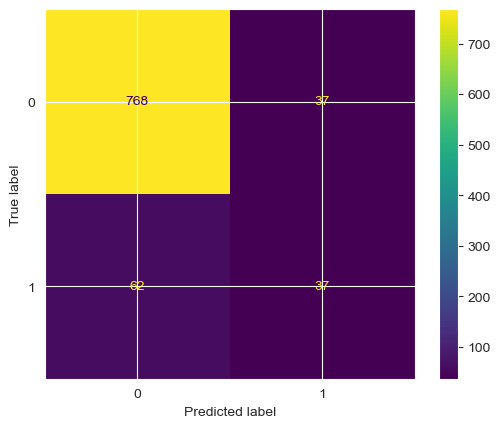

In [17]:
#model evauation
model.fit(x_train, y_train)

preds = model.predict(x_test)
baseline_score = accuracy_score(y_test, preds)
matrix = confusion_matrix(y_test, preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix) 
cm_display.plot()
plt.show()


[Text(0.5, 1.0, 'MDI Feature Importance'),
 Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature')]

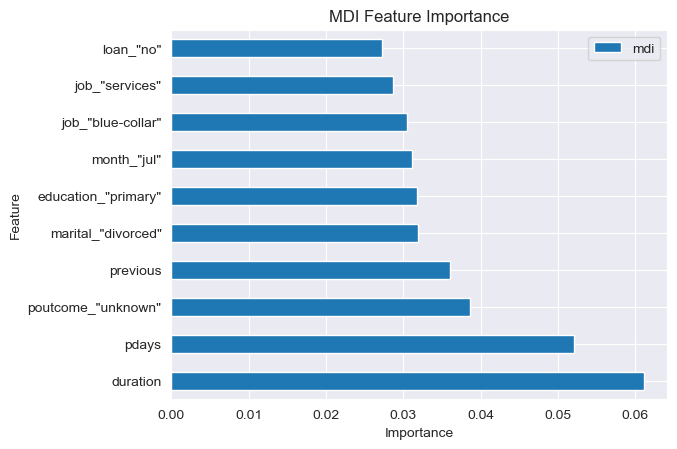

In [18]:
#Feature Importance 


#MDI Feature Importance
feat_names = model.get_booster().feature_names

importance = pd.DataFrame(model.feature_importances_, index=feat_names, columns=["mdi"])

importance = importance.sort_values("mdi", ascending=False)

importance.head(10).plot.barh().set(title="MDI Feature Importance", xlabel="Importance", ylabel="Feature")


[Text(0.5, 1.0, 'Permutation Feature Importance'),
 Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature')]

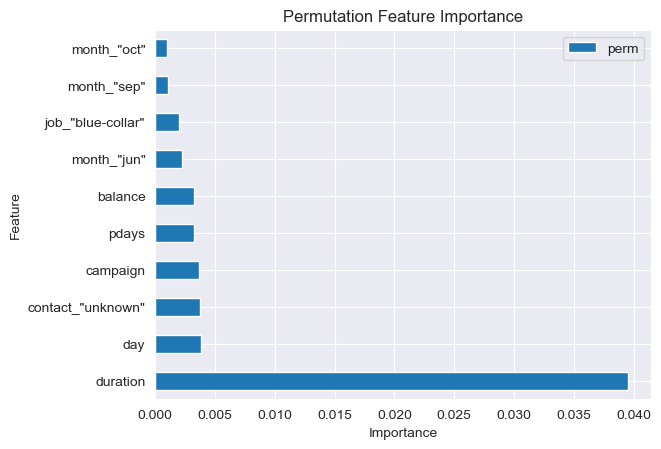

In [19]:
#Permutation Feature Importance
from sklearn.inspection import permutation_importance
perm = pd.DataFrame(permutation_importance(model, x_test, y_test, n_repeats=10)["importances_mean"], index=feat_names, columns=["perm"])

perm = perm.sort_values("perm", ascending=False)

perm.head(10).plot.barh().set(title="Permutation Feature Importance", xlabel="Importance", ylabel="Feature")

[Text(0.5, 1.0, 'Drop Column Feature Importance'),
 Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature')]

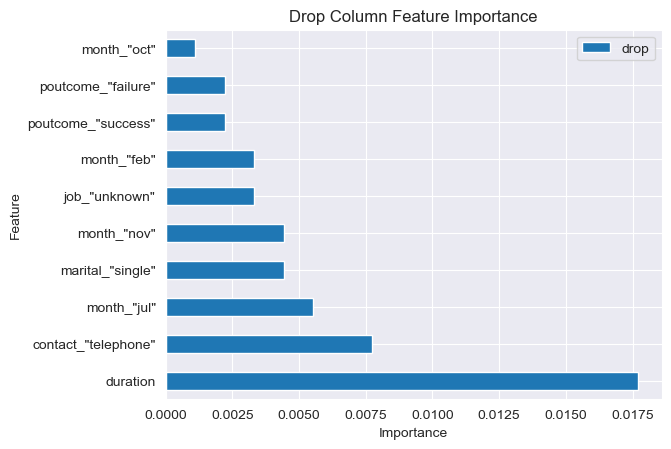

In [22]:
#Drop Column Feature Importance

scores = []

for col in x_train.columns:
    drop_model = XGBClassifier()
    drop_model.fit(x_train.drop(col, axis="columns"), y_train)
    drop_preds = drop_model.predict(x_test.drop(col, axis="columns"))
    
    scores.append(baseline_score - accuracy_score(y_test, drop_preds))
    
drop_df = pd.DataFrame(scores, index=x_train.columns.to_list(), columns=["drop"])

drop_df = drop_df.sort_values("drop", ascending=False)

drop_df.head(10).plot.barh().set(title="Drop Column Feature Importance", xlabel="Importance", ylabel="Feature")

In [23]:
#stacked ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_models = [("NB", GaussianNB()), ("LR", LogisticRegression()), ("RF", RandomForestClassifier())]
final_model = XGBClassifier(alpha=2, reg_lambda=2, max_depth=15)

stacked_model = StackingClassifier(base_models, final_estimator=final_model, cv=k_folds)


stacked_model.fit(x_train, y_train)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x1EF7658FD40, shuffle=True),
                   estimators=[('NB', GaussianNB()),
                               ('LR', LogisticRegression()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=XGBClassifier(alpha=2, base_score=None,
                                                 booster=None, callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=N...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=15, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...))

Precision:  0.5142857142857142
Accuracy:  0.8926991150442478
Recall:  0.36363636363636365
F1:  0.42603550295857984


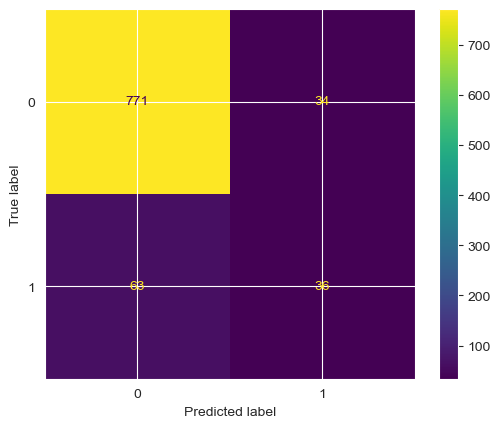

In [24]:
#model evaluation 
preds = stacked_model.predict(x_test)
print("Precision: ", precision_score(y_test, preds))
print("Accuracy: ", accuracy_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))

matrix = confusion_matrix(y_test, preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix) 
cm_display.plot()
plt.show()

#target varaibles are unevenly distirbuted. Weight targets or resample 